### Objective: Figure out the right people to target for the social media ad campaigns 

#### What is done below: 
- Datasets loaded
- Converting string columns with yes or no to binary 
- Converting contact variable to binary by removing 'other' and chanigng name to cellular 
- condensing job_type and month column 
- dropping high na variables and un-informative ones such as previous_campaign_outcome, num_prev_contacts, and days_since_last_contact
- converting boolean to int and string to category

##### Dataset name: df

In [1]:
# Loading Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# Import Data
df1 = pd.read_csv("Data/test.csv", delimiter=";")
df2 = pd.read_csv("Data/train.csv", delimiter=";")
df = pd.concat([df1, df2], axis=0)

# =============================================
# DATA PREPROCESSING
# =============================================

# 1. Convert binary text columns to numeric values
binary_mappings = {
    'default': {'yes': 1, 'no': 0},
    'housing': {'yes': 1, 'no': 0},
    'loan': {'yes': 1, 'no': 0},
    'y': {'yes': 1, 'no': 0},
    'contact': {'cellular': 1, 'telephone': 0}
}

for col, mapping in binary_mappings.items():
    df[col] = df[col].map(mapping)

# 2. Fix column names
df.columns = df.columns.str.replace('contact', 'cellular')
df.contact = df.cellular.astype(int, errors='ignore')

# 3. Replace invalid values
df.pdays.replace(-1, np.nan, inplace=True)

# 4. Rename columns for clarity
column_rename_map = {
    'age': 'client_age',
    'job': 'job_type',
    'marital': 'marital_status',
    'education': 'education_level',
    'default': 'credit_default',
    'balance': 'avg_yearly_balance_eur',
    'housing': 'housing_loan',
    'loan': 'personal_loan',
    'cellular': 'cellular_contact',
    'day': 'last_contact_day',
    'month': 'last_contact_month',
    'duration': 'last_contact_duration',
    'campaign': 'num_contacts_campaign',
    'pdays': 'days_since_last_contact',
    'previous': 'num_prev_contacts',
    'poutcome': 'prev_campaign_outcome',
    'y': 'subscribed_term_deposit'
}
df.rename(columns=column_rename_map, inplace=True)

# 5. Condense job categories
employment_mapping = {
    'management': 'White-Collar',
    'technician': 'White-Collar',
    'admin.': 'White-Collar',
    'self-employed': 'White-Collar',
    'entrepreneur': 'White-Collar',
    'blue-collar': 'Blue-Collar',
    'services': 'Blue-Collar',
    'housemaid': 'Blue-Collar',
    'retired': 'Retired/Unemployed',
    'unemployed': 'Retired/Unemployed',
    'student': 'Student'
}
df['job_type'] = df['job_type'].map(employment_mapping)

# 6. Group months into quarters
month_to_quarter = {
    'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
    'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
    'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
    'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
}
df['last_contact_month'] = df['last_contact_month'].map(month_to_quarter)

# 7. Remove unnecessary columns and handle missing values
columns_to_drop = [
    'prev_campaign_outcome',
    'days_since_last_contact',
    'num_prev_contacts'
]
df = df.drop(columns_to_drop, axis=1)
df.replace("unknown", np.nan, inplace=True)
df.dropna(inplace=True)

# 8. Convert columns to appropriate data types
# Numeric columns
int_columns = [
    'client_age', 'credit_default', 'housing_loan', 
    'personal_loan', 'cellular_contact', 'subscribed_term_deposit'
]
for col in int_columns:
    df[col] = df[col].astype(int)

# Categorical columns
cat_columns = [
    'job_type', 'marital_status', 
    'education_level', 'last_contact_month'
]
for col in cat_columns:
    df[col] = df[col].astype('category')

# Display summary statistics
skim(df)

/var/folders/3c/qc983p5977j3hhqv878r2n1m0000gp/T/ipykernel_94868/4044235159.py:31: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.contact = df.cellular.astype(int, errors='ignore')
/var/folders/3c/qc983p5977j3hhqv878r2n1m0000gp/T/ipykernel_94868/4044235159.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.pdays.replace(-1, np.nan, inplace=True)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 33971  │ │ int64       │ 10    │ │ job_type              │                                │
│ │ Number of columns │ 14     │ │ category    │ 4     │ │ marital_status        │                                │
│ └───────────────────┴────────┘ └─────────────┴───────┘ │ education_level       │                                │
│                                                        │ last_contact_month    │                                │
│                                                        └───────────────────────┘                                │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                  ┃ NA  ┃ NA %  ┃ mean     ┃ sd      ┃ p0     ┃ p25  ┃ p50  ┃ p75  ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ client_age              │   0 │     0 │    40.95 │   10.93 │     18 │   32 │   39 │   48 │     95 │  ▃█▅▁  │  │
│ │ credit_default          │   0 │     0 │  0.01643 │  0.1271 │      0 │    0 │    0 │    0 │      1 │   █    │  │
│ │ avg_yearly_balance_eur  │   0 │     0 │     1428 │    3182 │  -8019 │   79 │  471 │ 1504 │ 102100 │   █    │  │
│ │ housing_loan            │   0 │     0 │   0.4972 │     0.5 │      0 │    0 │    0 │    1 │      1 │ █    █ │  │
│ │ personal_loan           │   0 │     0 │    0.165 │  0.3712 │      0 │    0 │    0 │    0 │      1 │ █    ▂ │  │
│ │ cellular_contact        │   0 │     0 │   0.9125 │  0.2826 │      0 │    1 │    1 │    1 │      1 │ ▁    █ │  │
│ │ last_contact_day        │   0 │     0 │    15.98 │   8.212 │      1 │    9 │   16 │   21 │     31 │ ▄▆▇█▅▆ │  │
│ │ last_contact_duration   │   0 │     0 │    260.9 │   257.6 │      0 │  104 │  181 │  323 │   4918 │   █    │  │
│ │ num_contacts_campaign   │   0 │     0 │    2.756 │   2.963 │      1 │    1 │    2 │    3 │     50 │   █    │  │
│ │ subscribed_term_deposit │   0 │     0 │   0.1457 │  0.3529 │      0 │    0 │    0 │    0 │      1 │ █    ▁ │  │
│ └─────────────────────────┴─────┴───────┴──────────┴─────────┴────────┴──────┴──────┴──────┴────────┴────────┘  │
│                                                    category                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓  │
│ ┃ column                                      ┃ NA      ┃ NA %         ┃ ordered            ┃ unique         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩  │
│ │ job_type                                    │       0 │            0 │ False              │              4 │  │
│ │ marital_status                              │       0 │            0 │ False              │              3 │  │
│ │ education_level                             │       0 │            0 │ False              │              3 │  │
│ │ last_contact_month                          │       0 │            0 │ False              │              4 │  │
│ └─────────────────────────────────────────────┴─────────┴──────────────┴────────────────────┴────────────────┘  │
╰────────────────────────────────────────────────────── 

#### Editing Columns to make dummies and make boolean into int types
- making all category variables into dummy and dropping one to avoid multi-collinearity 
- converting them to int columns instead of bool

#### table name: **df_model**

In [2]:
print('Before')
print(df.columns)

# Make dummy columns by checking if the column is a category
list_category = df.select_dtypes(include=['category']).columns
df_model = pd.get_dummies(df, columns=list_category, drop_first=True)

# Convert boolean columns to int
bool_cols = df_model.select_dtypes(include=['bool']).columns
for col in bool_cols:
    df_model[col] = df_model[col].astype(int)

df_model = df_model.drop(columns=['marital_status_single'], errors='ignore')
df_model = df_model.drop(columns=['education_level_secondary'], errors='ignore')

print('After')
print(df_model.columns)

Before
Index(['client_age', 'job_type', 'marital_status', 'education_level',
       'credit_default', 'avg_yearly_balance_eur', 'housing_loan',
       'personal_loan', 'cellular_contact', 'last_contact_day',
       'last_contact_month', 'last_contact_duration', 'num_contacts_campaign',
       'subscribed_term_deposit'],
      dtype='object')
After
Index(['client_age', 'credit_default', 'avg_yearly_balance_eur',
       'housing_loan', 'personal_loan', 'cellular_contact', 'last_contact_day',
       'last_contact_duration', 'num_contacts_campaign',
       'subscribed_term_deposit', 'job_type_Retired/Unemployed',
       'job_type_Student', 'job_type_White-Collar', 'marital_status_married',
       'education_level_tertiary', 'last_contact_month_Q2',
       'last_contact_month_Q3', 'last_contact_month_Q4'],
      dtype='object')


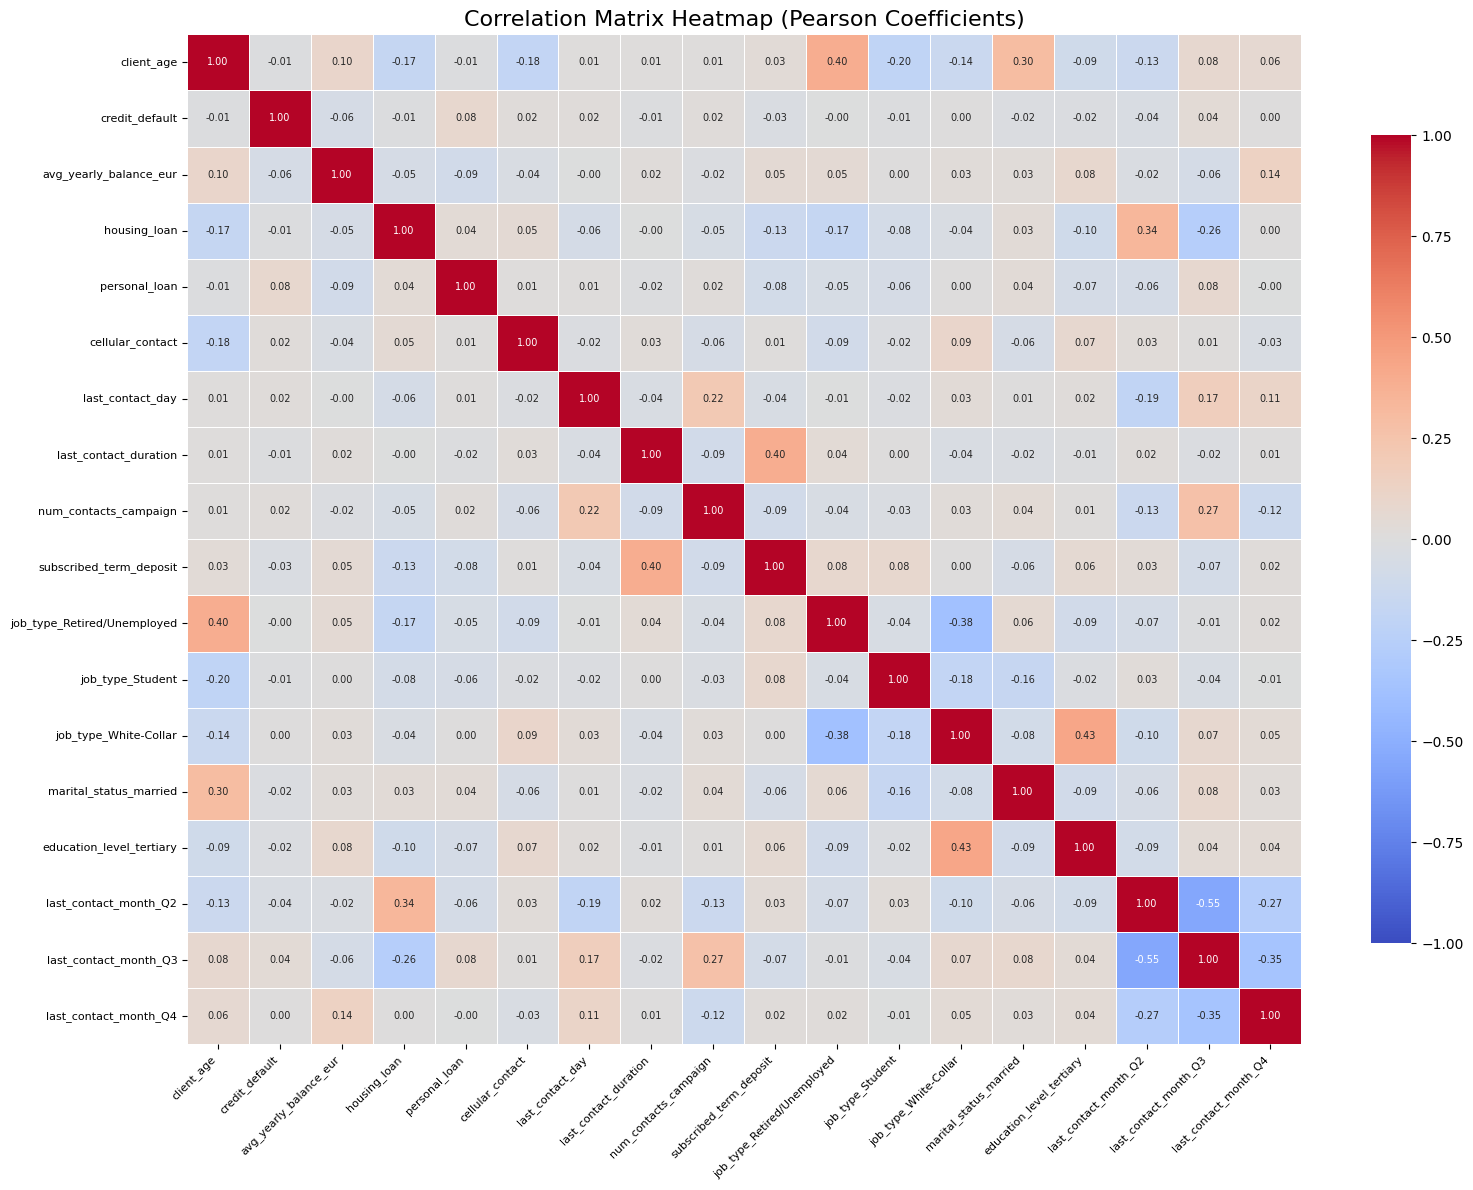

In [3]:
# Create a correlation matrix heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_model.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with a color bar and show Pearson correlation coefficients in each cell
# The Pearson correlation coefficient measures the linear relationship between two variables
# Values range from -1 to 1, where:
# 1 indicates perfect positive correlation (as one variable increases, the other increases linearly)
# -1 indicates perfect negative correlation (as one variable increases, the other decreases linearly)
# 0 indicates no linear correlation between the variables
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
                      vmin=-1, vmax=1, center=0, linewidths=0.5,
                      cbar_kws={"shrink": 0.8}, annot_kws={"size": 7})

# Add title
plt.title('Correlation Matrix Heatmap (Pearson Coefficients)', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Adjust layout to make room for labels
plt.tight_layout()

# Display the plot
plt.show()


#### Make k-nearest neighbor to understand group means. 

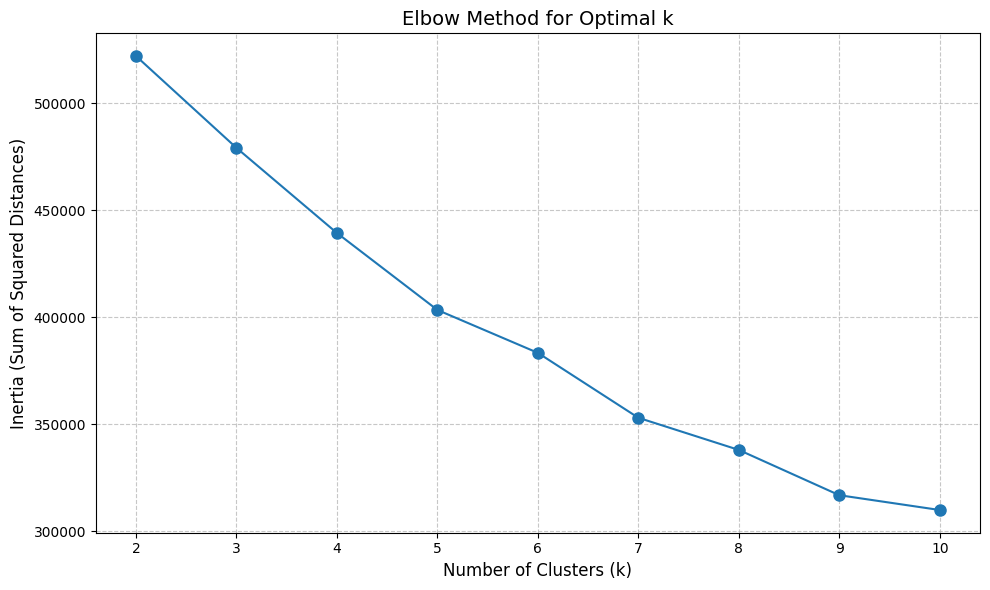

Cluster Statistics (Sorted by Conversion Rate):
  Cluster  Size  Conversion Rate (%)
Cluster 3  2913            24.373498
Cluster 0 11223            15.245478
Cluster 2  4604            14.965248
Cluster 1 15231            12.087191




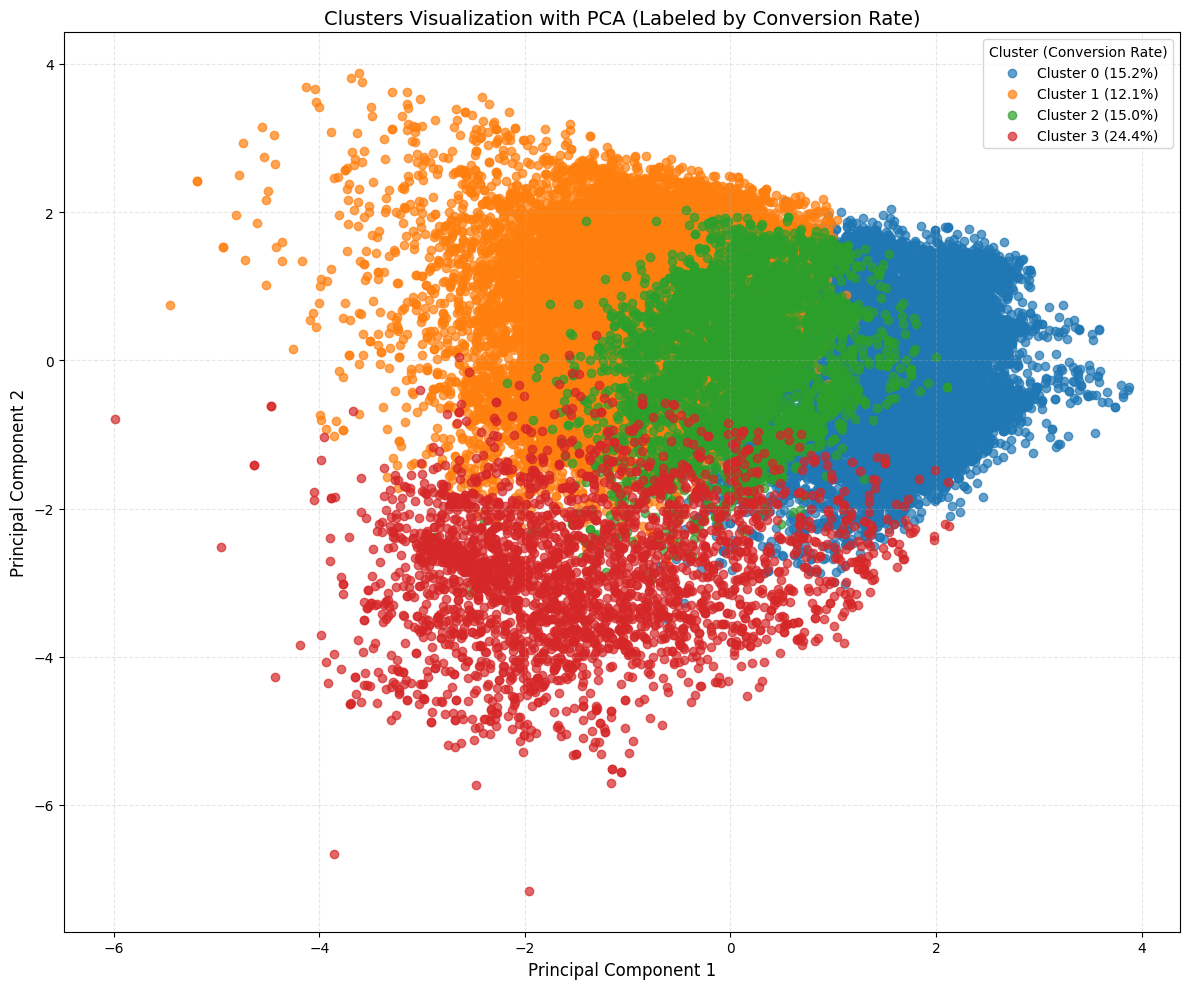

/var/folders/3c/qc983p5977j3hhqv878r2n1m0000gp/T/ipykernel_94868/2309777888.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.index, y=cluster_means.values, ax=axes[i], palette='viridis')
/var/folders/3c/qc983p5977j3hhqv878r2n1m0000gp/T/ipykernel_94868/2309777888.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_means.index, y=cluster_means.values, ax=axes[i], palette='viridis')
/var/folders/3c/qc983p5977j3hhqv878r2n1m0000gp/T/ipykernel_94868/2309777888.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x

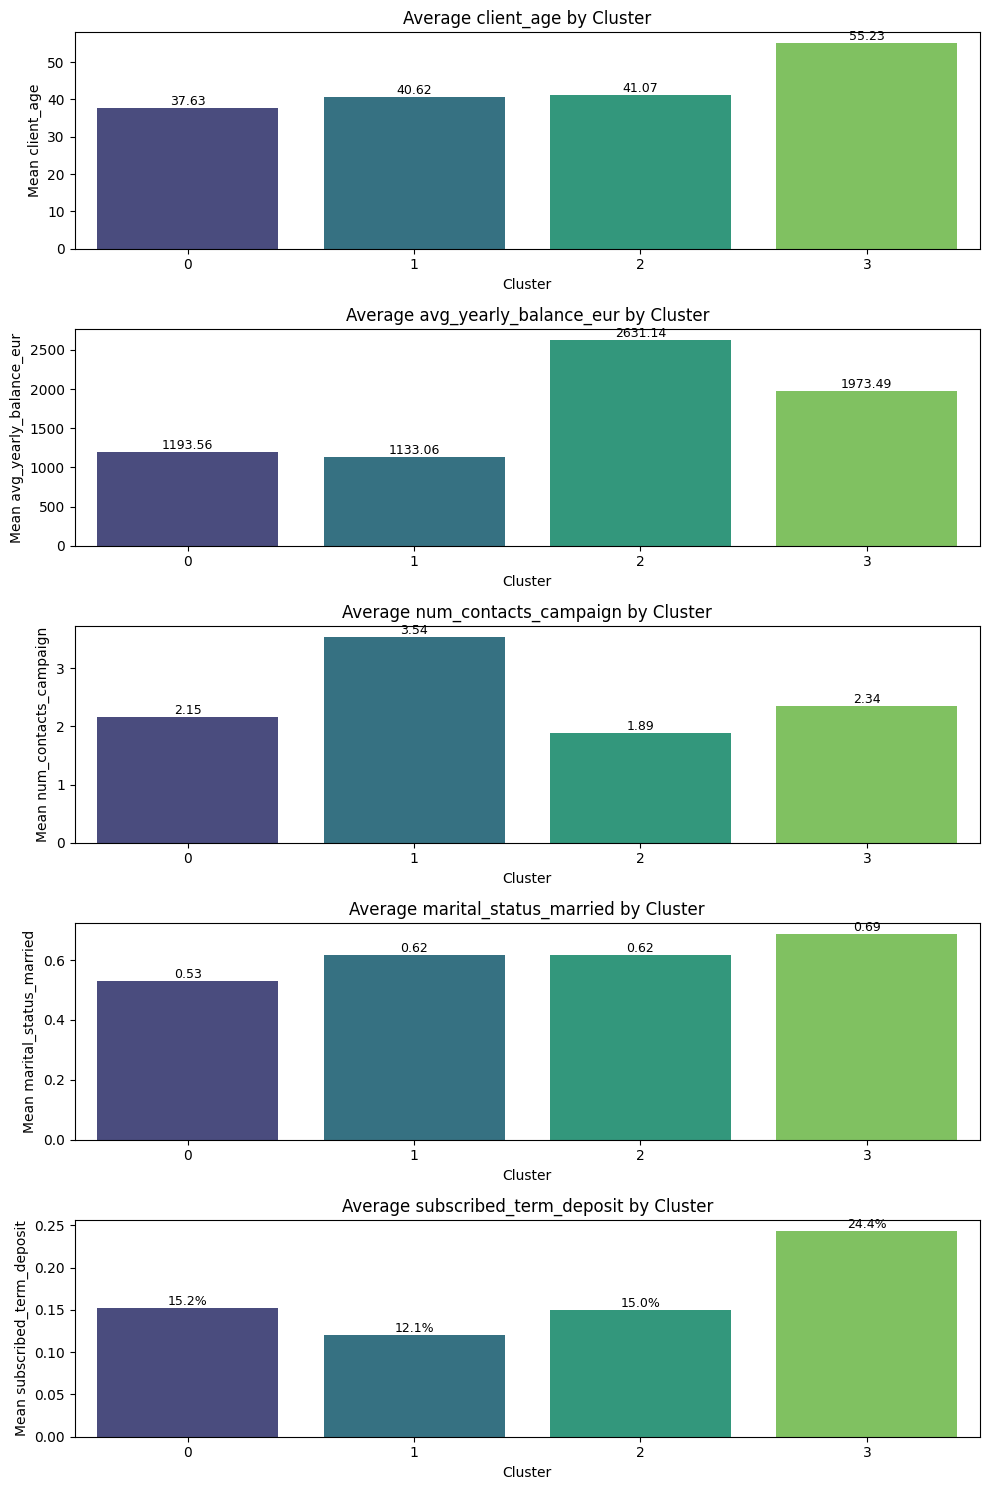

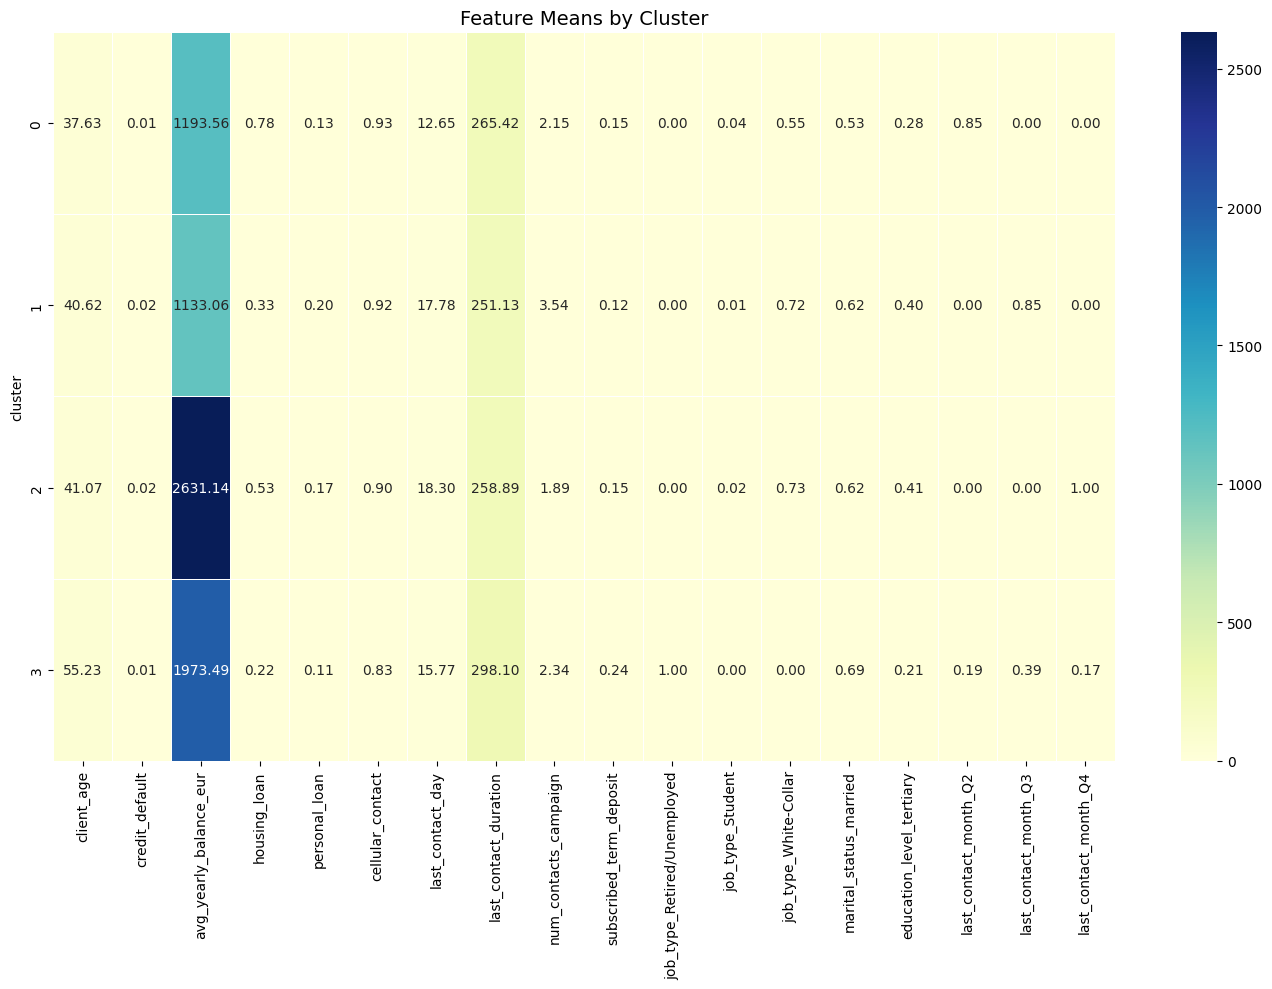


Detailed Analysis of Highest Converting Cluster (Cluster 3):
Conversion Rate: 24.37%
Cluster Size: 2913 customers (8.6% of total)

Key Characteristics (compared to overall average):
- client_age: 55.23 (+34.9% vs. overall avg)
- credit_default: 0.01 (-12.2% vs. overall avg)
- avg_yearly_balance_eur: 1973.49 (+38.2% vs. overall avg)
- housing_loan: 0.22 (-55.5% vs. overall avg)
- personal_loan: 0.11 (-35.1% vs. overall avg)
- cellular_contact: 0.83 (-9.5% vs. overall avg)
- last_contact_day: 15.77 (-1.4% vs. overall avg)
- last_contact_duration: 298.10 (+14.2% vs. overall avg)
- num_contacts_campaign: 2.34 (-15.0% vs. overall avg)
- job_type_Retired/Unemployed: 1.00 (+1064.6% vs. overall avg)
- job_type_Student: 0.00 (-100.0% vs. overall avg)
- job_type_White-Collar: 0.00 (-100.0% vs. overall avg)
- marital_status_married: 0.69 (+15.5% vs. overall avg)
- education_level_tertiary: 0.21 (-39.8% vs. overall avg)
- last_contact_month_Q2: 0.19 (-34.7% vs. overall avg)
- last_contact_month_Q

In [4]:
# Implementing K-Means clustering to identify groups with highest conversion rates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Select features for clustering (excluding the target variable)
features_for_clustering = df_model.drop(columns=['subscribed_term_deposit'], errors='ignore')

# Standardize the features (important for K-means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

# Based on the elbow method, choose an optimal number of clusters (let's say 4)
optimal_k = 4  # Adjust this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df_with_clusters = df_model.copy()
df_with_clusters['cluster'] = cluster_labels

# Calculate conversion rates and feature means for each cluster
cluster_stats = []
for cluster in range(optimal_k):
    cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster]
    conversion_rate = cluster_data['subscribed_term_deposit'].mean() * 100
    
    # Get means of all features for this cluster
    feature_means = cluster_data.drop(columns=['cluster']).mean().to_dict()
    
    # Add to our stats list
    cluster_stats.append({
        'Cluster': f'Cluster {cluster}',
        'Size': len(cluster_data),
        'Conversion Rate (%)': conversion_rate,
        **feature_means
    })

# Convert to DataFrame for easier analysis
cluster_stats_df = pd.DataFrame(cluster_stats)
cluster_stats_df = cluster_stats_df.sort_values('Conversion Rate (%)', ascending=False)

# Display cluster statistics
print("Cluster Statistics (Sorted by Conversion Rate):")
print(cluster_stats_df[['Cluster', 'Size', 'Conversion Rate (%)']].to_string(index=False))
print("\n")

# Visualize the clusters with PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame({
    'PCA1': pca_result[:, 0],
    'PCA2': pca_result[:, 1],
    'Cluster': cluster_labels,
    'Subscribed': df_model['subscribed_term_deposit']
})

# Plot clusters with PCA
plt.figure(figsize=(12, 10))

# Plot each cluster
for cluster in range(optimal_k):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['PCA1'], 
        cluster_data['PCA2'],
        alpha=0.7,
        label=f'Cluster {cluster} ({cluster_stats_df[cluster_stats_df["Cluster"] == f"Cluster {cluster}"]["Conversion Rate (%)"].values[0]:.1f}%)'
    )

plt.title('Clusters Visualization with PCA (Labeled by Conversion Rate)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster (Conversion Rate)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize key features by cluster
# Select top features that might be most interesting
top_features = ['client_age', 'avg_yearly_balance_eur', 'num_contacts_campaign', 'marital_status_married', 'subscribed_term_deposit']
if len(top_features) > 5:  # Limit to 5 features for readability
    top_features = top_features[:5]

# Create a figure with subplots for each feature
fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 3*len(top_features)))
if len(top_features) == 1:
    axes = [axes]  # Make sure axes is iterable even with one feature

for i, feature in enumerate(top_features):
    # Calculate mean values for each cluster
    cluster_means = df_with_clusters.groupby('cluster')[feature].mean()
    
    # Create bar plot
    sns.barplot(x=cluster_means.index, y=cluster_means.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {feature} by Cluster', fontsize=12)
    axes[i].set_xlabel('Cluster', fontsize=10)
    axes[i].set_ylabel(f'Mean {feature}', fontsize=10)
    
    # Add value labels on top of bars
    for j, v in enumerate(cluster_means.values):
        if feature == 'subscribed_term_deposit':
            # Format as percentage for the target variable
            axes[i].text(j, v, f'{v:.1%}', ha='center', va='bottom', fontsize=9)
        else:
            # Format as regular number for other features
            axes[i].text(j, v, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Create a heatmap of feature means by cluster
# Prepare data for heatmap - select numeric features only
numeric_features = df_with_clusters.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('cluster')  # Remove cluster column

# Calculate means for each feature by cluster
cluster_means = df_with_clusters.groupby('cluster')[numeric_features].mean()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Feature Means by Cluster', fontsize=14)
plt.tight_layout()
plt.show()

# Print detailed insights about the highest converting cluster
best_cluster = cluster_stats_df.iloc[0]['Cluster'].split(' ')[1]
best_cluster = int(best_cluster)
print(f"\nDetailed Analysis of Highest Converting Cluster (Cluster {best_cluster}):")
print(f"Conversion Rate: {cluster_stats_df.iloc[0]['Conversion Rate (%)']:.2f}%")
print(f"Cluster Size: {cluster_stats_df.iloc[0]['Size']} customers ({cluster_stats_df.iloc[0]['Size']/len(df_model)*100:.1f}% of total)")
print("\nKey Characteristics (compared to overall average):")

# Compare this cluster's means with overall means
overall_means = df_model.mean()
best_cluster_means = df_with_clusters[df_with_clusters['cluster'] == best_cluster].mean()

for feature in numeric_features:
    if feature != 'subscribed_term_deposit':
        diff_pct = (best_cluster_means[feature] - overall_means[feature]) / overall_means[feature] * 100
        print(f"- {feature}: {best_cluster_means[feature]:.2f} ({diff_pct:+.1f}% vs. overall avg)")


Feature Importances for Conversion:
               Feature  Importance
 last_contact_duration    0.736482
            client_age    0.096800
          housing_loan    0.072801
 last_contact_month_Q3    0.033994
 last_contact_month_Q2    0.022297
      last_contact_day    0.015843
marital_status_married    0.008292
avg_yearly_balance_eur    0.006814
         personal_loan    0.004208
 num_contacts_campaign    0.002469


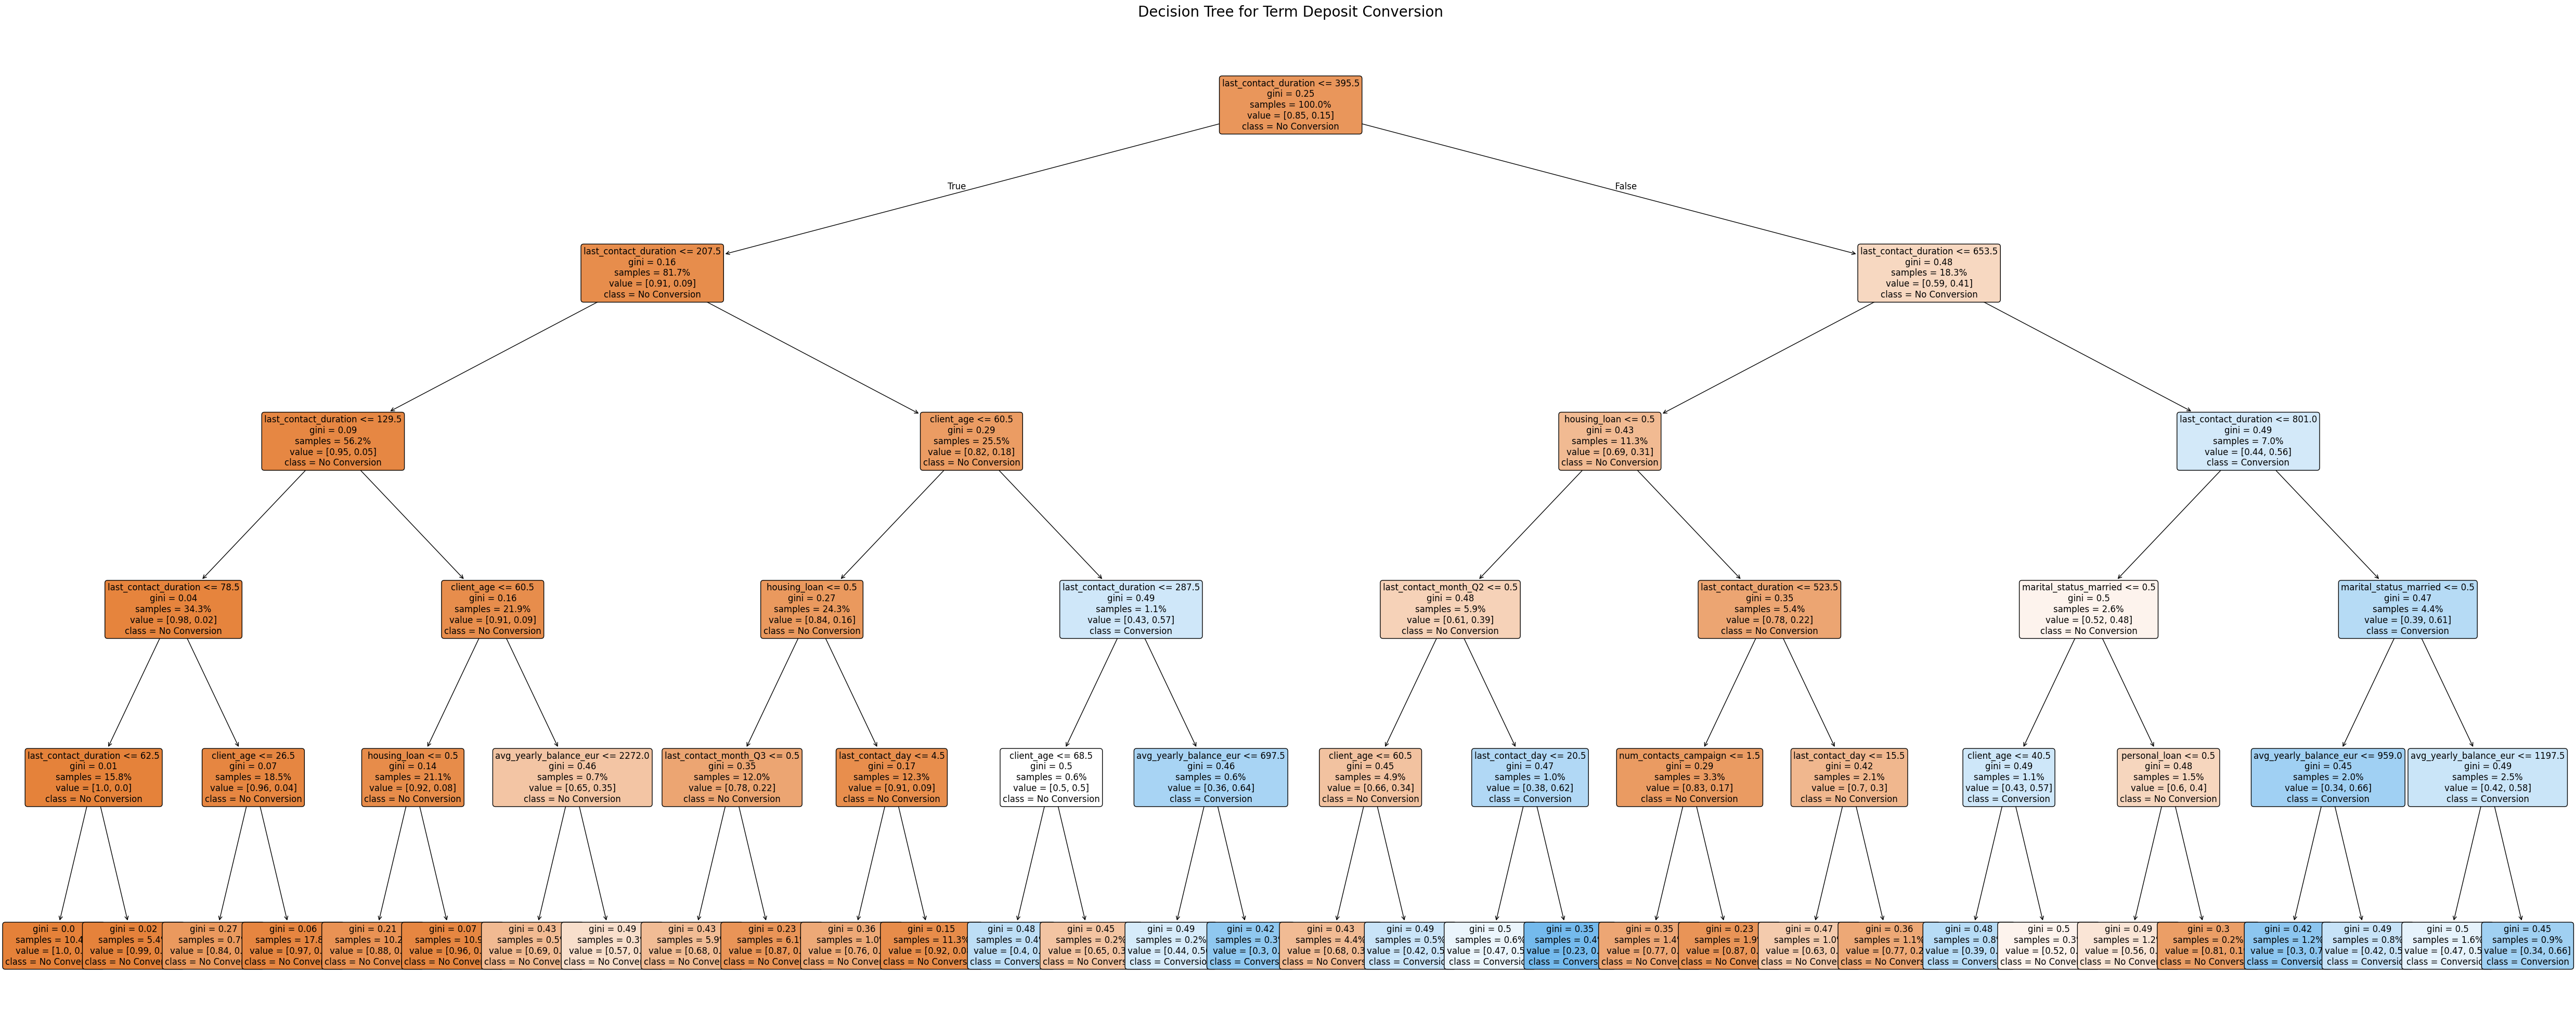

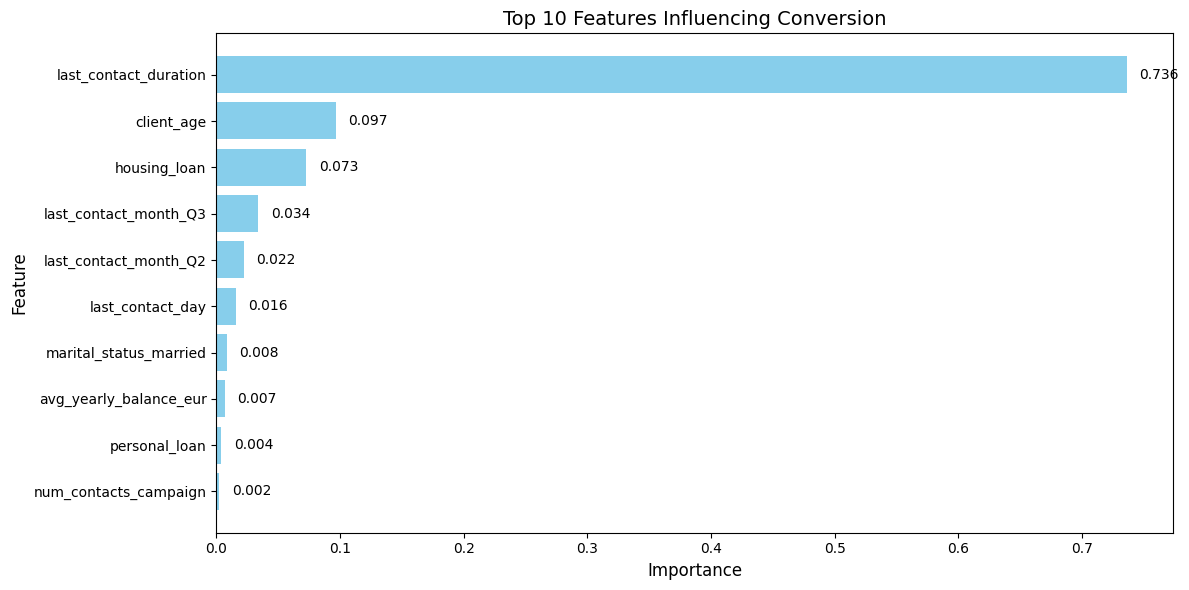


Decision Tree Rules:
|--- last_contact_duration <= 395.50
|   |--- last_contact_duration <= 207.50
|   |   |--- last_contact_duration <= 129.50
|   |   |   |--- last_contact_duration <= 78.50
|   |   |   |   |--- last_contact_duration <= 62.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- last_contact_duration >  62.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- last_contact_duration >  78.50
|   |   |   |   |--- client_age <= 26.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- client_age >  26.50
|   |   |   |   |   |--- class: 0
|   |   |--- last_contact_duration >  129.50
|   |   |   |--- client_age <= 60.50
|   |   |   |   |--- housing_loan <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- housing_loan >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- client_age >  60.50
|   |   |   |   |--- avg_yearly_balance_eur <= 2272.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_yearly_balance_eur >  2272.00
|   |   |   |   |   |-

In [111]:
# Decision Tree Analysis to understand factors influencing conversion
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare data for decision tree
X = df_model.drop(columns=['subscribed_term_deposit'])
y = df_model['subscribed_term_deposit']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and train a decision tree with controlled depth for interpretability
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Print feature importances
print("Feature Importances for Conversion:")
print(feature_importances.head(10).to_string(index=False))

# Visualize the decision tree with a much larger figure size
plt.figure(figsize=(50, 20))
plot_tree(dt_model, 
          feature_names=X.columns.tolist(), 
          class_names=['No Conversion', 'Conversion'],
          filled=True, 
          rounded=True, 
          fontsize=12,
          proportion=True,
          precision=2)
plt.title('Decision Tree for Term Deposit Conversion', fontsize=20)
plt.tight_layout()
plt.show()

# Create a more detailed visualization of top features
top_features = feature_importances.head(6)['Feature'].tolist()

# Create a horizontal bar chart for feature importance
plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importances.head(10)['Feature'], 
         feature_importances.head(10)['Importance'],
         color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Features Influencing Conversion', fontsize=14)
plt.gca().invert_yaxis()  # To have the most important at the top

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print the decision tree as text for detailed understanding
tree_rules = export_text(dt_model, feature_names=list(X.columns))
print("\nDecision Tree Rules:")
print(tree_rules)

# Analyze the decision paths for successful conversions
print("\nKey Decision Paths Leading to High Conversion Rates:")
# Get the decision path for all samples
decision_paths = dt_model.decision_path(X_train)
leaf_nodes = dt_model.apply(X_train)

# Find leaf nodes with high conversion rates
leaf_node_samples = {}
leaf_node_conversions = {}

for i, leaf in enumerate(leaf_nodes):
    if leaf not in leaf_node_samples:
        leaf_node_samples[leaf] = 0
        leaf_node_conversions[leaf] = 0
    
    leaf_node_samples[leaf] += 1
    if y_train.iloc[i] == 1:
        leaf_node_conversions[leaf] += 1

# Print the paths for the top 3 leaf nodes with highest conversion rates
high_conversion_leaves = sorted(
    [(leaf, leaf_node_conversions[leaf]/leaf_node_samples[leaf], leaf_node_samples[leaf]) 
     for leaf in leaf_node_samples if leaf_node_samples[leaf] >= 30],
    key=lambda x: x[1], reverse=True
)[:3]

for i, (leaf, conv_rate, samples) in enumerate(high_conversion_leaves):
    print(f"\nPath {i+1}: Conversion Rate = {conv_rate:.2%}, Samples = {samples}")
    # Find a sample that ends in this leaf
    sample_idx = np.where(leaf_nodes == leaf)[0][0]
    # Get the decision path for this sample
    path = decision_paths[sample_idx].indices
    
    # Print the decision path
    node_indicator = dt_model.decision_path(X_train.iloc[[sample_idx]])
    node_index = node_indicator.indices
    
    # Traverse the decision path
    for node_id in node_index:
        if dt_model.tree_.children_left[node_id] == dt_model.tree_.children_right[node_id]:  # leaf node
            continue
        
        if (X_train.iloc[sample_idx, dt_model.tree_.feature[node_id]] <= 
                dt_model.tree_.threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"
            
        feature_name = X.columns[dt_model.tree_.feature[node_id]]
        threshold_value = dt_model.tree_.threshold[node_id]
        
        print(f"    {feature_name} {threshold_sign} {threshold_value:.2f}")


In [5]:
def create_train_test_split(df, target_col='subscribed_term_deposit', test_size=0.2, random_state=42, 
                           resample_method=None, smote=False):
    """
    Create train and test splits with optional resampling of the target variable.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe to split
    target_col : str, default='subscribed_term_deposit'
        The target column name
    test_size : float, default=0.2
        The proportion of the dataset to include in the test split
    random_state : int, default=42
        Controls the shuffling applied to the data before applying the split
    resample_method : str, default=None
        If 'even', resample the training data to have even class distribution
        If None, no resampling is performed
    smote : bool, default=False
        If True, apply SMOTE to oversample the minority class
        
    Returns:
    --------
    X_train, X_test, y_train, y_test : numpy arrays or pandas DataFrames
        The train and test splits
    """
    from sklearn.model_selection import train_test_split
    
    # Split features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                       random_state=random_state, 
                                                       stratify=y)
    
    # Apply resampling if requested
    if resample_method == 'even':
        from sklearn.utils import resample
        
        # Get indices of each class
        indices_0 = y_train[y_train == 0].index
        indices_1 = y_train[y_train == 1].index
        
        # Determine which class is minority
        if len(indices_0) > len(indices_1):
            majority_indices = indices_0
            minority_indices = indices_1
        else:
            majority_indices = indices_1
            minority_indices = indices_0
        
        # Downsample majority class
        downsampled_majority = resample(majority_indices, 
                                       replace=False,
                                       n_samples=len(minority_indices),
                                       random_state=random_state)
        
        # Combine minority class with downsampled majority class
        balanced_indices = np.concatenate([minority_indices, downsampled_majority])
        
        # Extract balanced dataset
        X_train = X_train.loc[balanced_indices]
        y_train = y_train.loc[balanced_indices]
    
    # Apply SMOTE if requested
    if smote:
        try:
            from imblearn.over_sampling import SMOTE
            smote = SMOTE(random_state=random_state)
            X_train, y_train = smote.fit_resample(X_train, y_train)
        except ImportError:
            print("Warning: SMOTE requires the imbalanced-learn package. Install with: pip install imbalanced-learn")
            print("Proceeding without SMOTE.")

    
    
    print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
    print(f"Training set target distribution: {np.bincount(y_train)}")
    print(f"Test set target distribution: {np.bincount(y_test)}")
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = create_train_test_split(df_model, smote=True)


Training set shape: (46430, 17), Test set shape: (6795, 17)
Training set target distribution: [23215 23215]
Test set target distribution: [5805  990]


#### ⬇️ Log Transfomrations for normalization

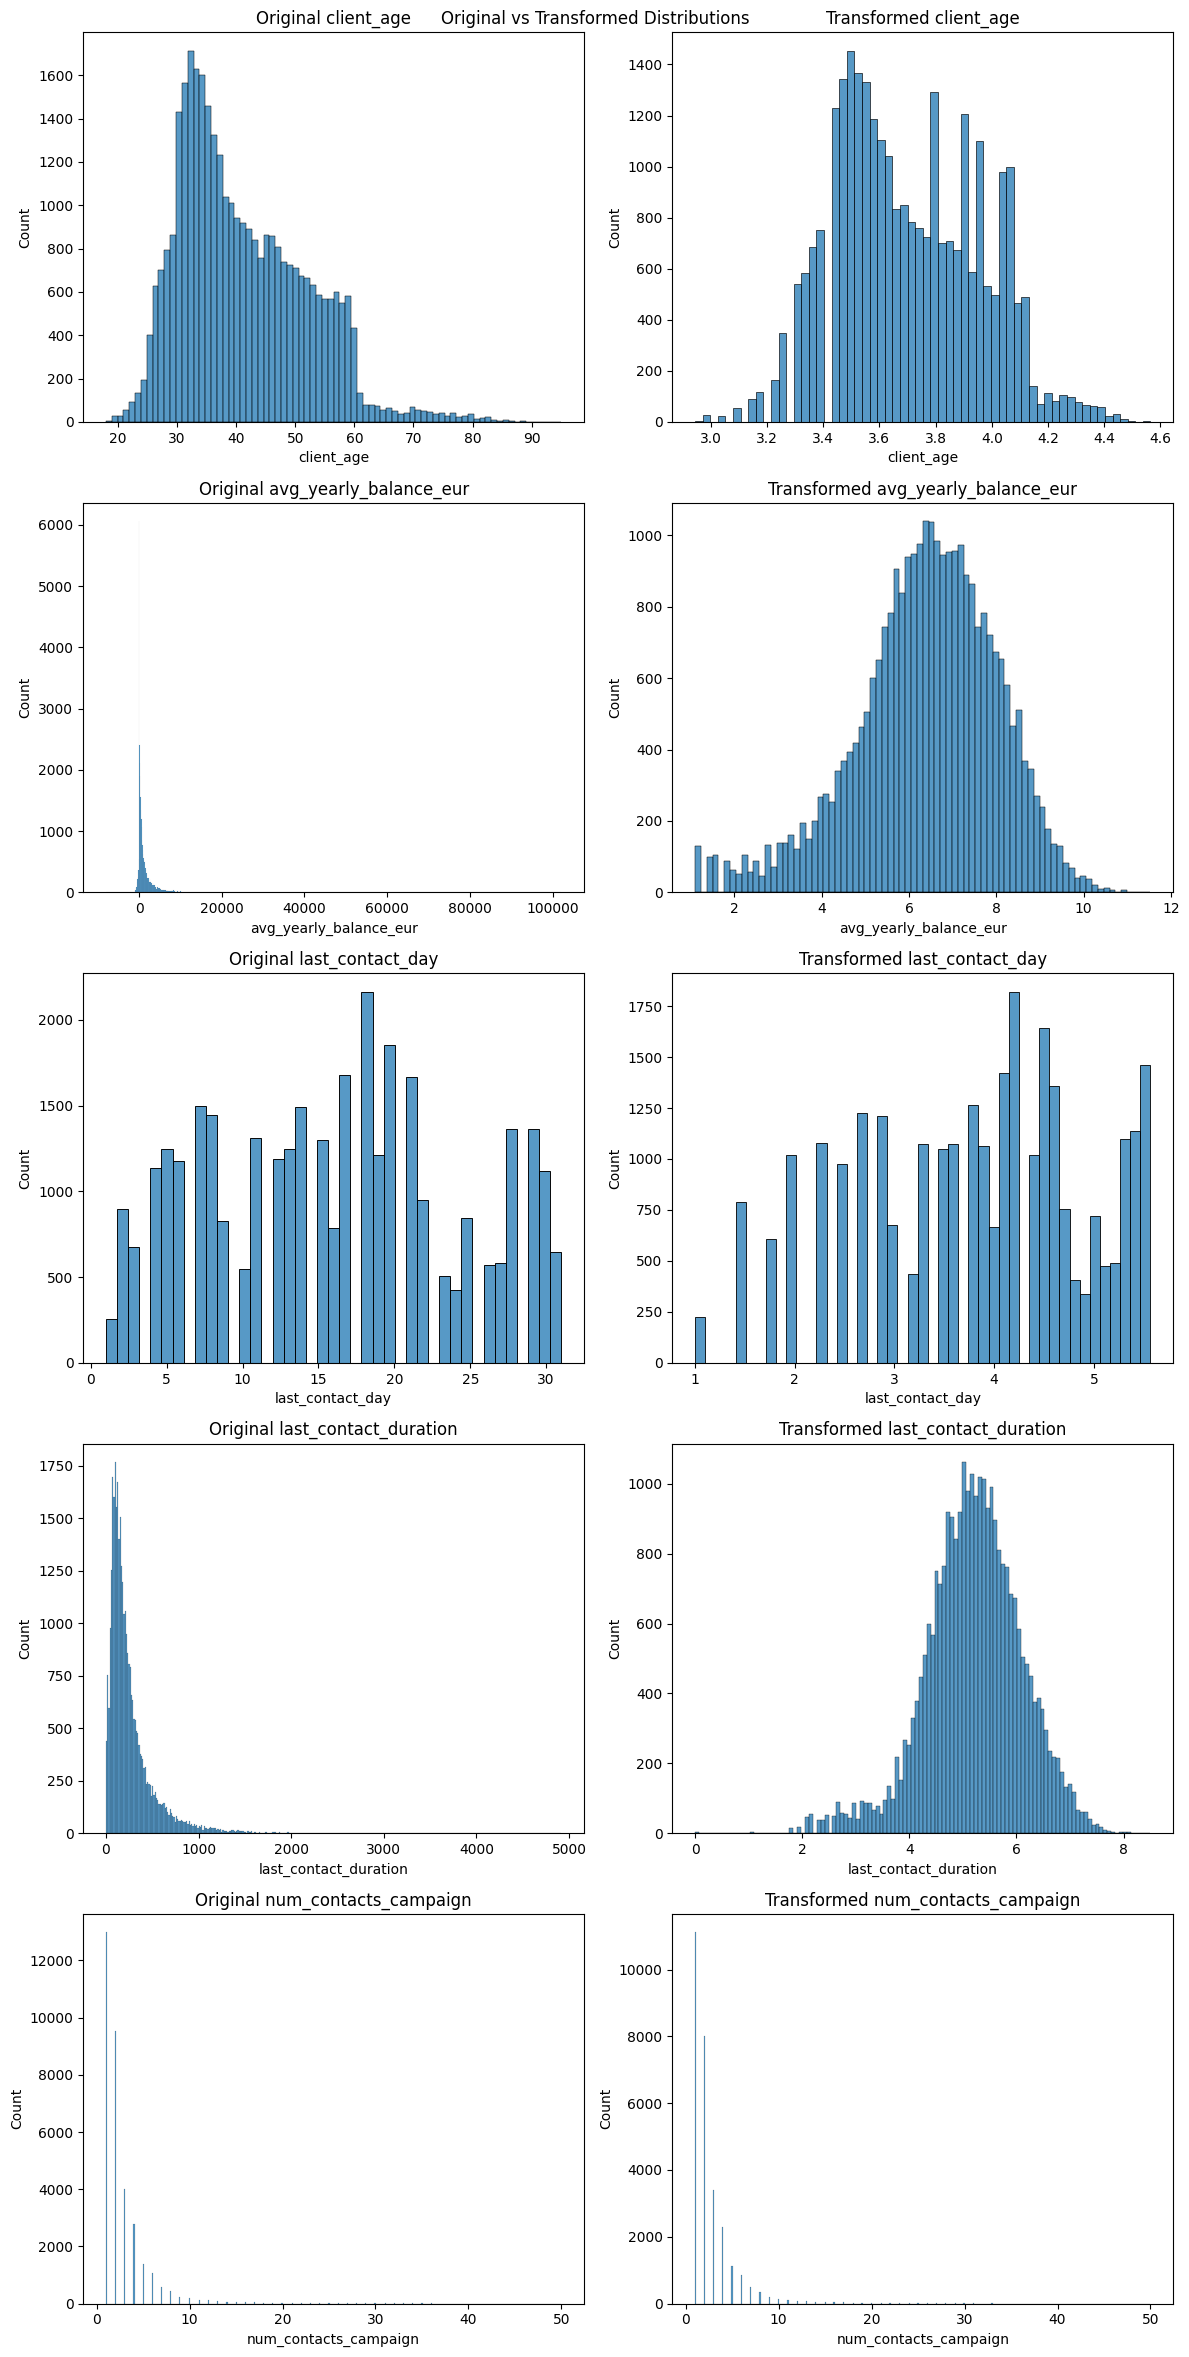

In [134]:
# Create transformed dataframe
df_trans = df_model.copy()

df_trans['client_age'] = np.log1p(df_trans['client_age'])

# Yearly Balance with 0s removed
df_trans = df_trans[df_trans['avg_yearly_balance_eur'] > 1]
df_trans['avg_yearly_balance_eur'] = np.log1p(df_trans['avg_yearly_balance_eur'])

# Square root transform last_contact_day
df_trans['last_contact_day'] = np.sqrt(df_trans['last_contact_day'])

# Log transform last_contact_duration 
df_trans['last_contact_duration'] = np.log1p(df_trans['last_contact_duration'])

# Create visualization of transformations
fig, axes = plt.subplots(5, 2, figsize=(12, 24))
fig.suptitle('Original vs Transformed Distributions')

# Plot original vs transformed for each variable
cols = ['client_age', 'avg_yearly_balance_eur', 'last_contact_day', 
        'last_contact_duration', 'num_contacts_campaign']
for idx, col in enumerate(cols):
    # Original distribution
    sns.histplot(data=df_model, x=col, ax=axes[idx,0])
    axes[idx,0].set_title(f'Original {col}')
    
    # Transformed distribution
    sns.histplot(data=df_trans, x=col, ax=axes[idx,1])
    axes[idx,1].set_title(f'Transformed {col}')

plt.tight_layout()
plt.show()


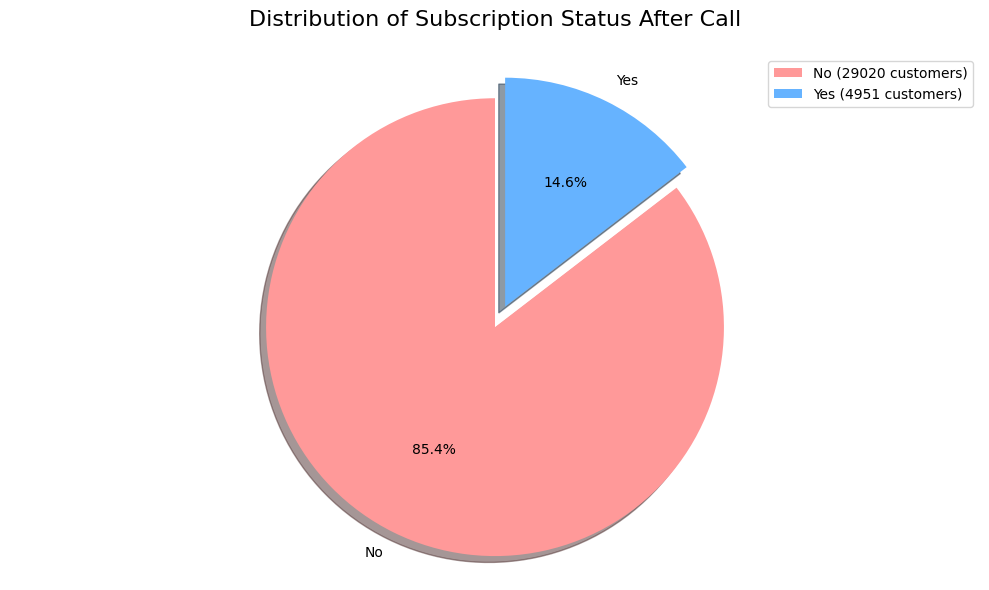

In [25]:
# Create a pie chart to visualize the distribution of subscription (yes/no)
plt.figure(figsize=(10, 6))

# Count the values in the subscription column
subscription_counts = df_model['subscribed_term_deposit'].value_counts()

# Calculate percentages
subscription_percentages = subscription_counts / subscription_counts.sum() * 100

# Create the pie chart with percentages
plt.pie(
    subscription_counts, 
    labels=['No', 'Yes'] if subscription_counts.index[0] == 0 else ['Yes', 'No'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    explode=(0, 0.1),  # Explode the 'Yes' slice for emphasis
    shadow=True
)

# Add a title
plt.title('Distribution of Subscription Status After Call', fontsize=16, pad=20)

# Add a legend with counts
plt.legend(
    [f'No ({subscription_counts[0]} customers)', 
     f'Yes ({subscription_counts[1]} customers)'] 
    if subscription_counts.index[0] == 0 else 
    [f'Yes ({subscription_counts[1]} customers)', 
     f'No ({subscription_counts[0]} customers)'],
    loc='best'
)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.tight_layout()
plt.show()


In [135]:
df_trans.describe()

,client_age,credit_default,avg_yearly_balance_eur,housing_loan,personal_loan,cellular_contact,last_contact_day,last_contact_duration,num_contacts_campaign,subscribed_term_deposit,job_type_Retired/Unemployed,job_type_Student,job_type_White-Collar,marital_status_married,education_level_tertiary,last_contact_month_Q2,last_contact_month_Q3,last_contact_month_Q4
count,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000,28581.000000
mean,3.703514,0.006788,6.389137,0.487912,0.148910,0.910780,3.820514,5.198977,2.686785,0.156293,0.088695,0.023407,0.603583,0.592492,0.352962,0.303418,0.395228,0.157447
std,0.255785,0.082109,1.638487,0.499863,0.356006,0.285066,1.131217,0.902122,2.799256,0.363139,0.284308,0.151195,0.489162,0.491379,0.477899,0.459742,0.488908,0.364228
min,2.944439,0.000000,1.098612,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.496508,0.000000,5.463832,0.000000,0.000000,1.000000,3.000000,4.663439,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.688879,0.000000,6.505784,0.000000,0.000000,1.000000,4.000000,5.220356,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.912023,0.000000,7.519692,1.000000,0.000000,1.000000,4.582576,5.783825,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,4.564348,1.000000,11.533982,1.000000,1.000000,1.000000,5.567764,8.500861,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Training set shape: (46430, 17), Test set shape: (6795, 17)
Training set target distribution: [23215 23215]
Test set target distribution: [5805  990]
Logistic Regression Model Summary:
                              Logit Regression Results                             
Dep. Variable:     subscribed_term_deposit   No. Observations:                 6795
Model:                               Logit   Df Residuals:                     6777
Method:                                MLE   Df Model:                           17
Date:                     Fri, 21 Mar 2025   Pseudo R-squ.:                  0.2093
Time:                             20:16:04   Log-Likelihood:                -2230.5
converged:                            True   LL-Null:                       -2821.1
Covariance Type:                 nonrobust   LLR p-value:                1.425e-240
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

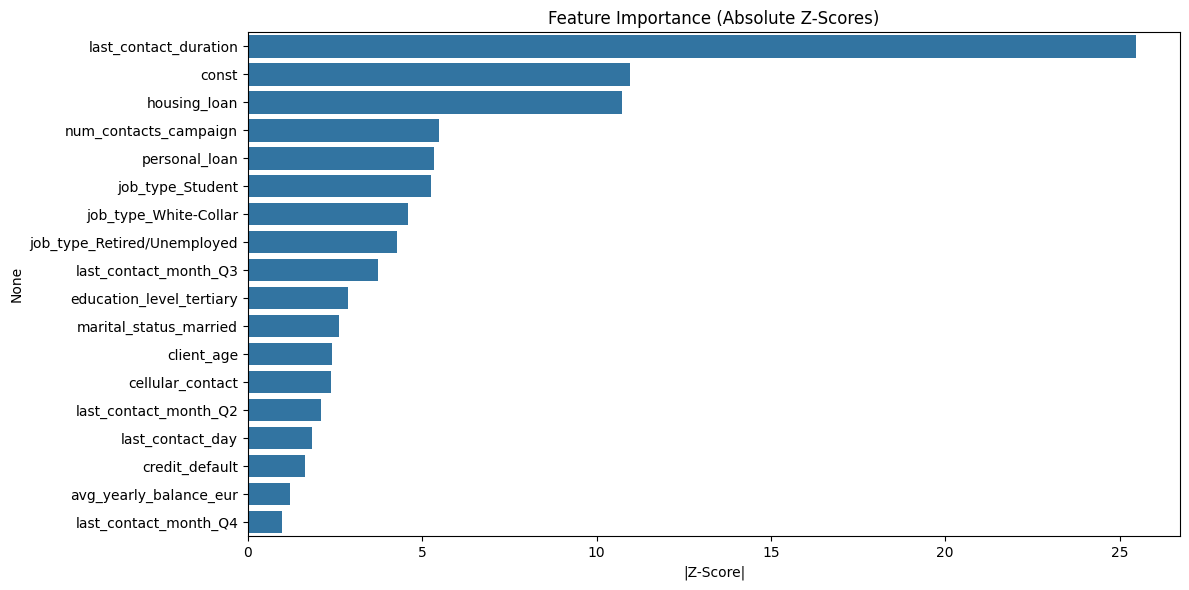

In [9]:
#import statsmodels
import statsmodels.api as sm

# Train a Logistic Regression Model using statsmodels
X_test_logit, X_train_logit, y_test_logit, y_train_logit = create_train_test_split(df_model, smote=True)

# Train the logistic regression model with a constant
X_train_logit = sm.add_constant(X_train_logit)
X_test_logit = sm.add_constant(X_test_logit)   # Add constant for intercept
model = sm.Logit(y_train_logit, X_train_logit)
result = model.fit(disp=0)  # disp=0 suppresses convergence messages

# Print model summary
print("Logistic Regression Model Summary:")
print(result.summary())

# Calculate odds ratios
odds_ratios = np.exp(result.params)
conf_int = np.exp(result.conf_int())

# Create a DataFrame to display odds ratios and confidence intervals
odds_ratio_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Lower 95% CI': conf_int[0],
    'Upper 95% CI': conf_int[1]
})

print("\nOdds Ratios:")
print(odds_ratio_df)

# Model fit statistics
print("\nModel Fit Statistics:")
print(f"Log-Likelihood: {result.llf:.4f}")
print(f"AIC: {result.aic:.4f}")
print(f"BIC: {result.bic:.4f}")
print(f"Pseudo R-squared: {result.prsquared:.4f}")

# Plot feature importance based on absolute z-scores
plt.figure(figsize=(12, 6))
feature_importance = abs(result.tvalues).sort_values(ascending=False)
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance (Absolute Z-Scores)')
plt.xlabel('|Z-Score|')
plt.tight_layout()
plt.show()


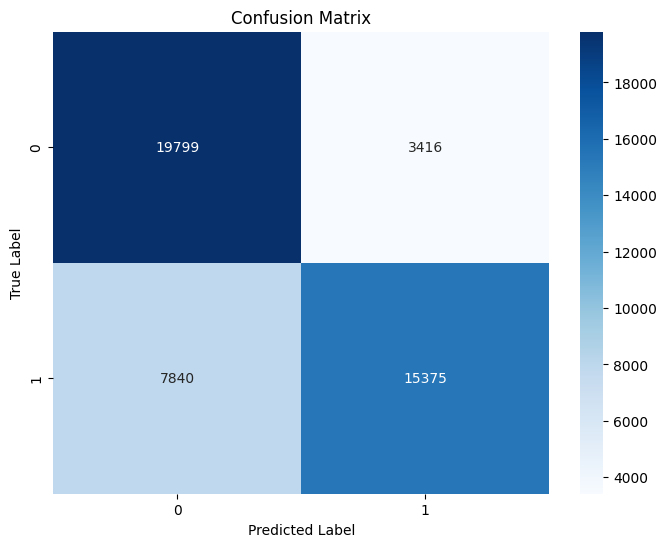


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.85      0.78     23215
           1       0.82      0.66      0.73     23215

    accuracy                           0.76     46430
   macro avg       0.77      0.76      0.76     46430
weighted avg       0.77      0.76      0.76     46430



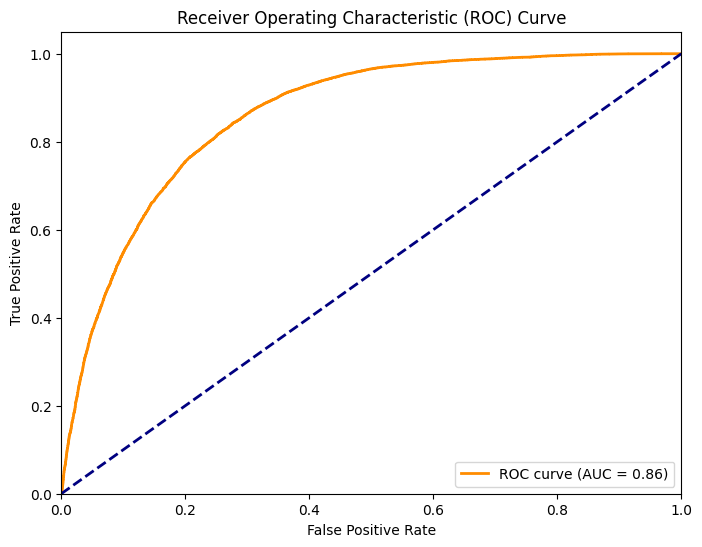

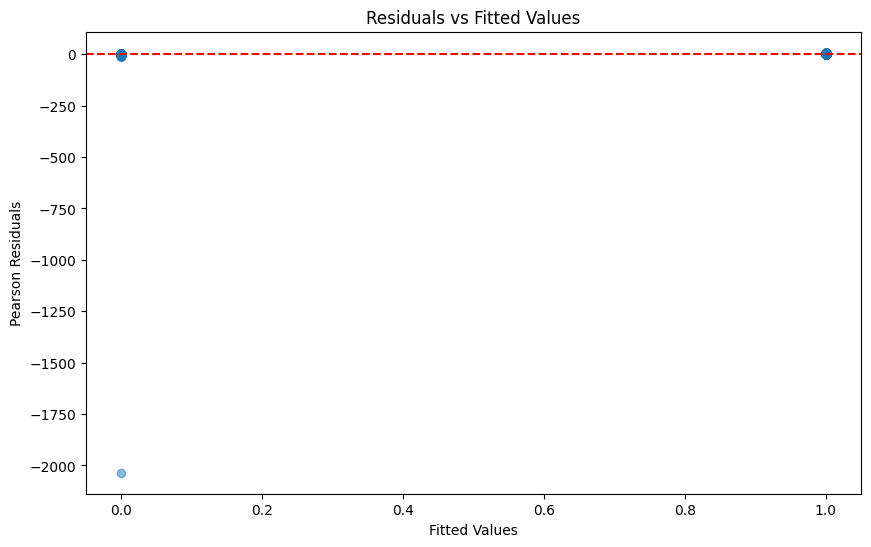

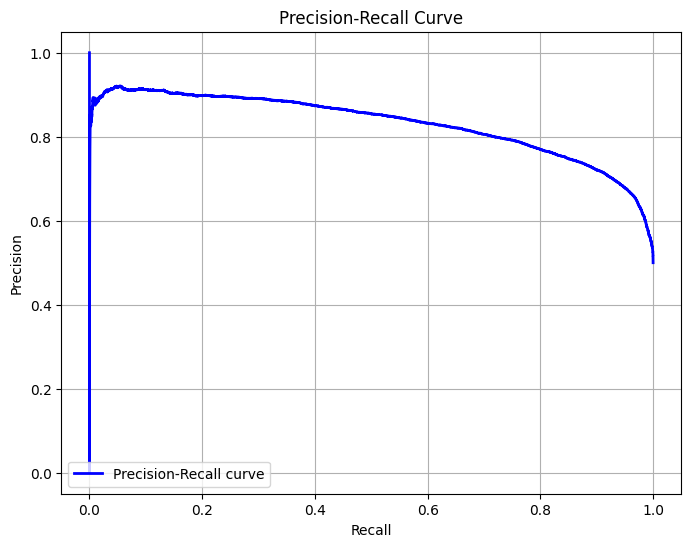


Variance Inflation Factors:
                       Variable        VIF
0                         const  39.770243
16        last_contact_month_Q3   1.502875
15        last_contact_month_Q2   1.481419
12        job_type_White-Collar   1.399288
1                    client_age   1.389329
17        last_contact_month_Q4   1.267881
14     education_level_tertiary   1.260112
4                  housing_loan   1.255213
10  job_type_Retired/Unemployed   1.248487
13       marital_status_married   1.193906
9         num_contacts_campaign   1.136810
7              last_contact_day   1.078321
11             job_type_Student   1.074937
8         last_contact_duration   1.074516
5                 personal_loan   1.069833
6              cellular_contact   1.059198
3        avg_yearly_balance_eur   1.051947
2                credit_default   1.014285


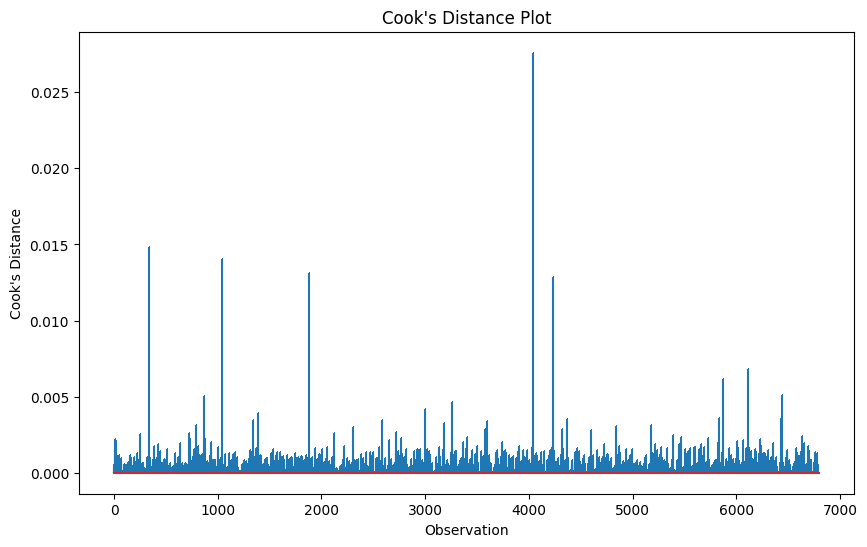


Model Performance Metrics:
Accuracy: 0.758
Precision: 0.818
Recall: 0.662
F1 Score: 0.732

Hosmer-Lemeshow Test:
Chi-square statistic: 30494.334
p-value: 0.000


In [18]:
# Model Evaluation and Diagnostics

# 1. Get predictions and probabilities
y_pred_proba = result.predict(X_test_logit)
y_pred = (y_pred_proba > 0.2).astype(int)

# 2. Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test_logit, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_logit, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_logit, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Model Diagnostics

# Pearson Residuals
residuals = result.resid_pearson
fitted_values = y_train_logit

# Residuals vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Pearson Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test_logit, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision') 
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# 4. Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X_test_logit.columns
vif_data["VIF"] = [variance_inflation_factor(X_test_logit.values, i) for i in range(X_test_logit.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data.sort_values('VIF', ascending=False))

# 5. Influence Statistics
influence = result.get_influence()
leverage = influence.hat_matrix_diag
cook_dist = influence.cooks_distance[0]

# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(range(len(cook_dist)), cook_dist, markerfmt=',')
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()

# 6. Model Performance Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test_logit, y_pred):.3f}")
print(f"Precision: {precision_score(y_test_logit, y_pred):.3f}")
print(f"Recall: {recall_score(y_test_logit, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test_logit, y_pred):.3f}")

# 7. Hosmer-Lemeshow Test
from scipy.stats import chi2

def hosmer_lemeshow_test(y_true, y_pred_proba, n_groups=10):
    # Create groups
    quantiles = pd.qcut(y_pred_proba, n_groups, labels=False)
    
    observed = np.zeros((n_groups, 2))
    expected = np.zeros((n_groups, 2))
    
    for i in range(n_groups):
        mask = quantiles == i
        observed[i, 1] = np.sum(y_true[mask])
        observed[i, 0] = np.sum(mask) - observed[i, 1]
        expected[i, 1] = np.sum(y_pred_proba[mask])
        expected[i, 0] = np.sum(mask) - expected[i, 1]
    
    chi_stat = np.sum((observed - expected)**2 / expected)
    p_value = 1 - chi2.cdf(chi_stat, n_groups - 2)
    
    return chi_stat, p_value

hl_stat, p_value = hosmer_lemeshow_test(y_test_logit, y_pred_proba)
print("\nHosmer-Lemeshow Test:")
print(f"Chi-square statistic: {hl_stat:.3f}")
print(f"p-value: {p_value:.3f}")


Training set shape: (46430, 17), Test set shape: (6795, 17)
Training set target distribution: [23215 23215]
Test set target distribution: [5805  990]

SVM Model Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     23215
           1       0.78      0.85      0.81     23215

    accuracy                           0.80     46430
   macro avg       0.80      0.80      0.80     46430
weighted avg       0.80      0.80      0.80     46430



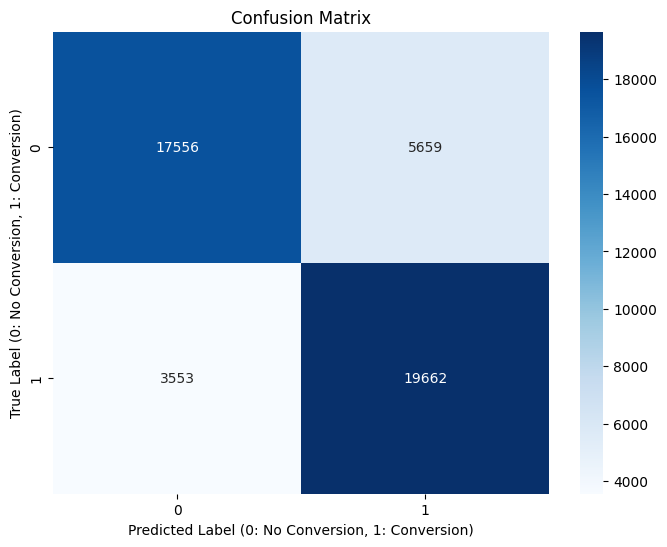

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# Train a Logistic Regression Model using statsmodels
X_test_svm, X_train_svm, y_test_svm, y_train_svm = create_train_test_split(df_model, smote=True)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
X_train_svm = scaler.fit_transform(X_train_svm)
X_test_svm = scaler.transform(X_test_svm)

# Train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions
y_pred = svm_model.predict(X_test_svm)

# Output diagnostic report focusing on recall
print("\nSVM Model Classification Report:")
print(classification_report(y_test_svm, y_pred, zero_division=0))

# Confusion Matrix
svm_cm = confusion_matrix(y_test_svm, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label (0: No Conversion, 1: Conversion)')
plt.xlabel('Predicted Label (0: No Conversion, 1: Conversion)')
plt.show()




100%|██████████| 10/10 [01:23<00:00,  8.37s/it]


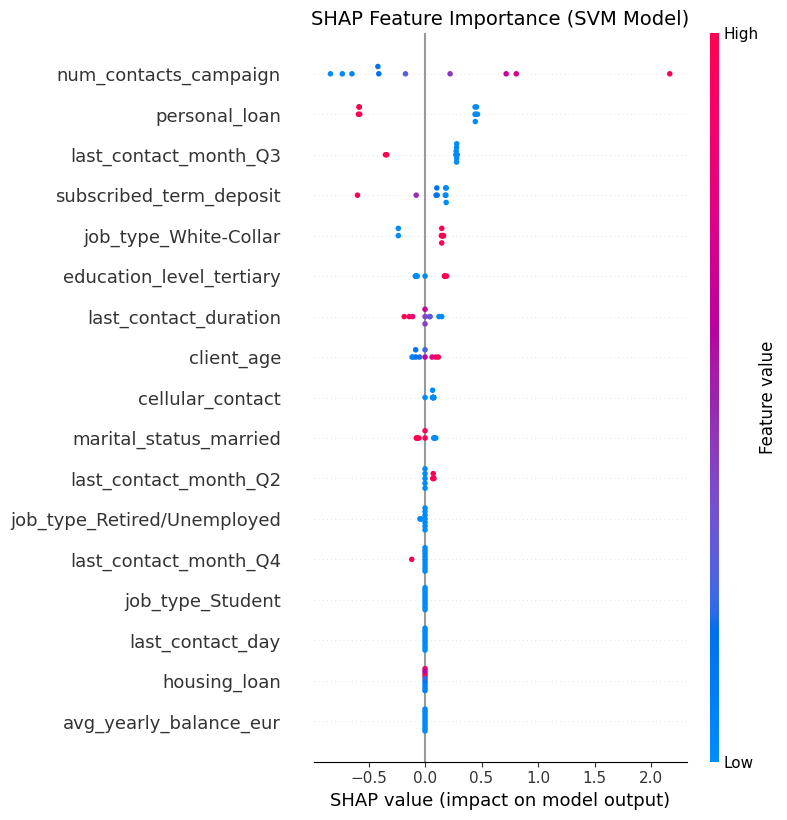

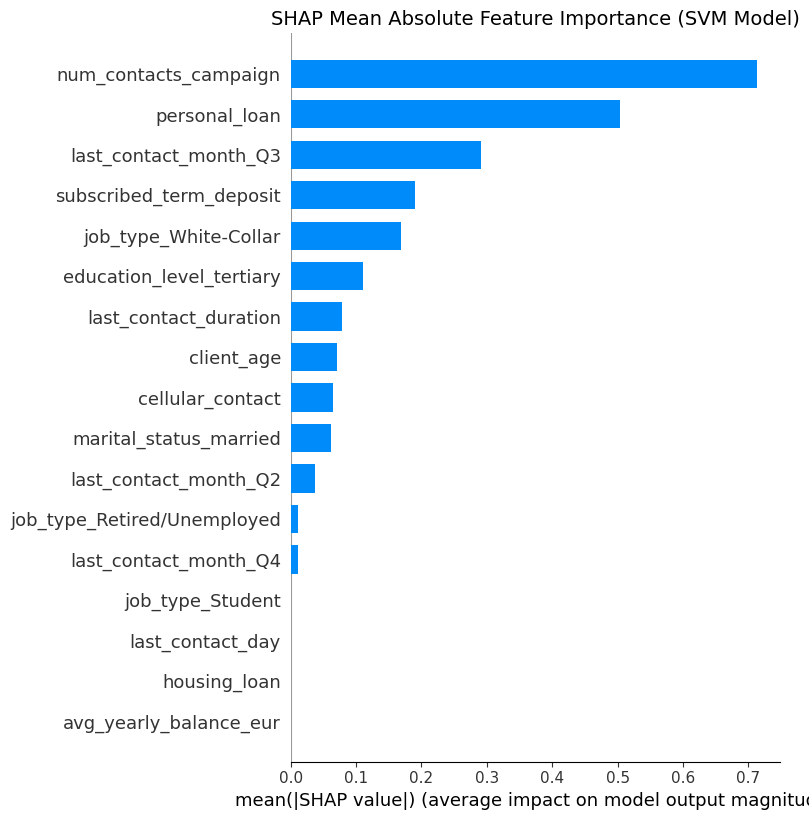


SVM Model Global Interpretation:
- Features at the top of the beeswarm plot have the highest impact on model predictions
- Red points indicate higher feature values, blue points indicate lower feature values
- Points to the right show positive impact on prediction (increasing likelihood of default)
- Points to the left show negative impact on prediction (decreasing likelihood of default)


In [17]:
# SHAP Analysis for SVM Model
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer for the SVM model
explainer = shap.KernelExplainer(svm_model.decision_function, shap.sample(X_train_svm, 100))

# Calculate SHAP values for the test set (using a sample for efficiency)
sample_size = min(10, X_test_svm.shape[0])
sample_indices = np.random.choice(X_test_svm.shape[0], sample_size, replace=False)
X_test_sample = X_test_svm[sample_indices]

# Compute SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Get feature names from the original dataframe
feature_names = df_model.drop(columns=['credit_default']).columns

# Create summary plot (beeswarm)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
plt.title('SHAP Feature Importance (SVM Model)', fontsize=14)
plt.tight_layout()
plt.show()

# Create bar plot for global feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, plot_type='bar', show=False)
plt.title('SHAP Mean Absolute Feature Importance (SVM Model)', fontsize=14)
plt.tight_layout()
plt.show()

# Print interpretation
print("\nSVM Model Global Interpretation:")
print("- Features at the top of the beeswarm plot have the highest impact on model predictions")
print("- Red points indicate higher feature values, blue points indicate lower feature values")
print("- Points to the right show positive impact on prediction (increasing likelihood of default)")
print("- Points to the left show negative impact on prediction (decreasing likelihood of default)")
